## A Linear Regression Model to Predict Car Prices

### Based on Parameters like:
#### - No. of Years Old
#### - Kilometres Driven
#### - Mileage
#### - Engine
#### - Power


In [1]:
using LinearAlgebra

In [ ]:
import Pkg

Pkg.add("Distributions")
Pkg.add("StatsPlots")
Pkg.add("HypothesisTests")
Pkg.add("GLM")
Pkg.add("ORCA")
Pkg.add("Plots")
Pkg.add("DataFrames")

In [ ]:
using Distributions
using DataFrames
using StatsPlots
using HypothesisTests
using GLM 
using ORCA
using Plots

In [4]:
using DelimitedFiles
data = DelimitedFiles.readdlm("Car.csv", ',')

950×6 Matrix{Float64}:
 2014.0  145500.0  23.4   1248.0   74.0   450000.0
 2014.0  120000.0  21.14  1498.0  103.52  370000.0
 2006.0  140000.0  17.7   1497.0   78.0   158000.0
 2010.0  127000.0  23.0   1396.0   90.0   225000.0
 2007.0  120000.0  16.1   1298.0   88.2   130000.0
 2017.0   45000.0  20.14  1197.0   81.86  440000.0
 2007.0  175000.0  17.3   1061.0   57.5    96000.0
 2001.0    5000.0  16.1    796.0   37.0    45000.0
 2011.0   90000.0  23.59  1364.0   67.1   350000.0
 2013.0  169000.0  20.0   1399.0   68.1   200000.0
 2014.0   68000.0  19.01  1461.0  108.45  500000.0
 2005.0  100000.0  17.3    993.0   60.0    92000.0
 2009.0  140000.0  19.3   1248.0   73.9   280000.0
    ⋮                                          ⋮
 2012.0   40000.0  20.54  1598.0  103.6   350000.0
 2012.0   70000.0  23.2   1248.0   73.94  300000.0
 2018.0   10000.0  11.36  2755.0  171.5        1.745e6
 2014.0   90000.0  14.0   2523.0   75.0   611000.0
 2016.0   68000.0  19.4   1198.0   86.8   400000.0
 2013.

In [ ]:
X=data[:,1:5]

In [ ]:
y=data[:,6]

In [ ]:
X[:,1]=(X[:,1].*(-1)).+2021.0

In [8]:
function normalEqn(X,y)
    theta= (inv(transpose(X)*X))*transpose(X)*y
    return theta
end

normalEqn (generic function with 1 method)

In [9]:
function plt(X,y,s)
    plot(X, y,   
    marker = (:cross, 5),
    title       = "Price(Rs.) v.Feature", 
    xlabel    = s,
    ylabel    = "Price(Rs.)",   
    line   = (:scatter),
    ylims= (1.0*10^5,5.0*10^6),
    yticks= 1.0*10^5:1.0*10^6:5.0*10^6,
    leg= false,
    grid        = false)
end


plt (generic function with 1 method)

In [10]:
function randInitialise(features)
    W = zeros(Float64, features+1, 1)
    epsilon = 0.12
    W = ((rand(features+1, 1).* 2).* epsilon).-epsilon
    return W
end

randInitialise (generic function with 1 method)

In [11]:
function cost(X, y, theta)
    m = size(y, 1)
    J = (1/(2*m))*((transpose(X*theta-y))*(X*theta-y))
    return J
end

cost (generic function with 1 method)

In [12]:
function normalise(X)
    X_norm = X;
    mu = zeros(Float64, 1, size(X, 2))
    sigma = zeros(Float64, 1, size(X, 2))

    for i=1:size(X,2)
        mu[i]=mean(X[:, i])
        sigma[i]=std(X[:, i])
    end

    for i=1:size(X,2)
        X_norm[:,i]=X_norm[:,i].-mu[i]
        N=X_norm[:, i]/sigma[i]
        X_norm[:, i]=N
    end
    
    return X_norm,mu,sigma
end


normalise (generic function with 1 method)

In [13]:
function gradDesc(X, y, theta, alpha, num_iters)
    m= size(y,1);
    J_all= zeros(Float64, num_iters, 1)
    for i = 1:num_iters
        theta= theta - (alpha/m)*(transpose((transpose(X*theta-y))*X))
        J_all[i]=cost(X,y,theta)[1,1]
    end
    
    return theta,J_all
end

gradDesc (generic function with 1 method)

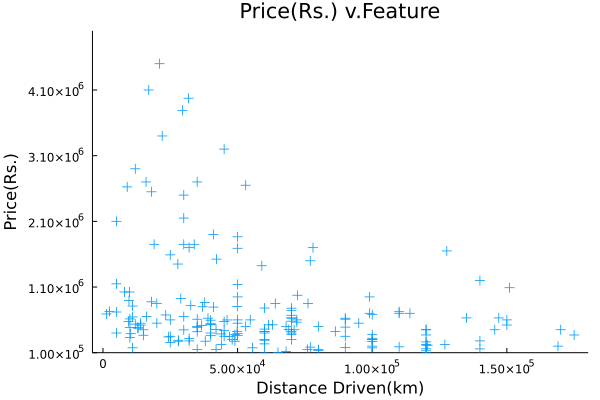

In [14]:
# Visualising data
# 1. Price(Rs.) vs Distance Driven(km)
plt(X[1:200,2],y[1:200], "Distance Driven(km)")

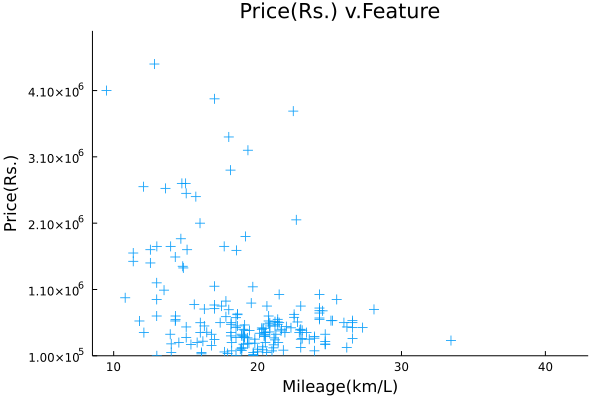

In [15]:
# Visualising data
# 2. Price(Rs.) vs Mileage(km/L)
plt(X[1:200,3],y[1:200], "Mileage(km/L)")

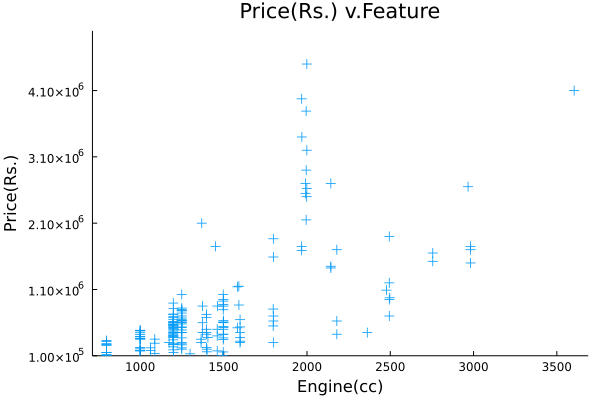

In [16]:
# Visualising data
# 3. Price(Rs.) vs Engine(cc)
plt(X[1:200,4],y[1:200], "Engine(cc)")

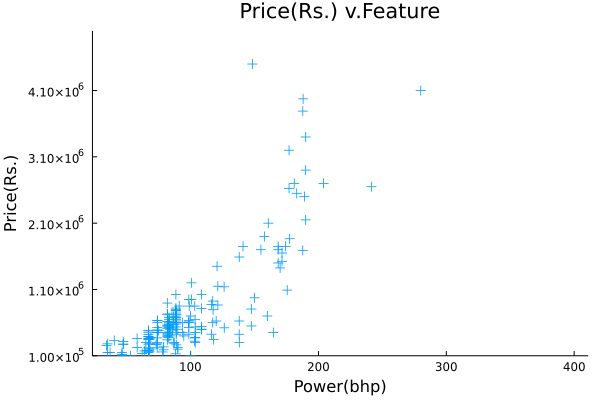

In [17]:
# Visualising data
# 4. Price(Rs.) vs Power(bhp)
plt(X[1:200,5],y[1:200], "Power(bhp)")

In [27]:
X= data[:,1:5]
# Normalising Features
X,mu,sigma= normalise(X)
X= [ones(Float64, size(y,1), 1) X]

# Running Gradient Descent
alpha = 0.03
num_iters = 400

theta= randInitialise(5)
# Theta(Parameters) from Gradient Descent
theta,J_all=gradDesc(X, y, theta, alpha, num_iters)

# Theta(Parameters) from Normal Equations
X2= data[:,1:5]
X2[:,1]=(X2[:,1].*(-1)).+2021.0
X2=[ones(Float64, size(y,1),1) X2]
theta2=normalEqn(X2, y)


6×1 Matrix{Float64}:
  643256.1424573977
   79797.00763723407
 -133035.40524858897
  132532.48413589614
   57352.029991770636
  653165.4464982114

### Now that we have our Parameters,
### We can set it to work on the Test Set.

In [ ]:
using DelimitedFiles
data2 = DelimitedFiles.readdlm("car_test.csv", ',')

In [ ]:
X_t= data2[:,1:5]
X_t[:,1]=(X_t[:,1].*(-1)).+2021.0
X_t

In [28]:
# Testing it on Test set

m_t=size(X_t,1)
for i=1:m_t
    price= [1.0 X_t[i,1] X_t[i,2] X_t[i,3] X_t[i,4] X_t[i,5]]*theta2
    println("Estimated Price of a Car with:")
    println("1. $(X_t[i,1]) yrs old")
    println("2. $(X_t[i,2]) km driven")
    println("3. $(X_t[i,3]) kmpl mileage")
    println("4. $(X_t[i,4]) CC engine")
    println("5. $(X_t[i,5]) bhp Power")
    println("= Rs.", round(price[1,1]; digits=2))
    println()
end

    

Estimated Price of a Car with:
1. 6.0 yrs old
2. 50000.0 km driven
3. 26.59 kmpl mileage
4. 1248.0 CC engine
5. 74.0 bhp Power
= Rs.633537.93

Estimated Price of a Car with:
1. 8.0 yrs old
2. 25000.0 km driven
3. 18.5 kmpl mileage
4. 1197.0 CC engine
5. 82.85 bhp Power
= Rs.557631.26

Estimated Price of a Car with:
1. 4.0 yrs old
2. 80000.0 km driven
3. 20.51 kmpl mileage
4. 998.0 CC engine
5. 67.04 bhp Power
= Rs.253246.48

Estimated Price of a Car with:
1. 13.0 yrs old
2. 191000.0 km driven
3. 17.92 kmpl mileage
4. 1086.0 CC engine
5. 62.1 bhp Power
= Rs.-426149.48

Estimated Price of a Car with:
1. 8.0 yrs old
2. 50000.0 km driven
3. 18.9 kmpl mileage
4. 998.0 CC engine
5. 67.1 bhp Power
= Rs.200814.23

Estimated Price of a Car with:
1. 7.0 yrs old
2. 80000.0 km driven
3. 22.54 kmpl mileage
4. 1396.0 CC engine
5. 88.73 bhp Power
= Rs.672342.49

Estimated Price of a Car with:
1. 8.0 yrs old
2. 110000.0 km driven
3. 18.5 kmpl mileage
4. 1197.0 CC engine
5. 82.85 bhp Power
= Rs.314270.